## Librairies

In [ ]:
!pip install pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=aa670984ea6f847c4376792ea78238d24d8aed4e0059ee8287b4659d2d18b22a
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=bdd73ccb189156d00ccd2c6902ae450b75c85f5ea5a442bac1a3aec9ca7671d9
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyldavis sklearn


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 16.4 MB/s eta 0:00:00


In [ ]:
### Mandatory
import pandas as pd
import numpy as np
import datetime as dt
import time


### Plotting
import missingno as mn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import pyLDAvis

### Collab and options
from google.colab import drive
import sys
drive.mount('/content/gdrive')
pd. set_option('display.max_rows', 500)
pd. set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 800)
np.set_printoptions(threshold=sys.maxsize)
import warnings
warnings.filterwarnings('ignore')

### SKlearn

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.manifold import TSNE

### Deep Learning
import transformers
from transformers import *

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


Mounted at /content/gdrive


In this section we will try to classify item based on their description. To do this we will try different techniques :

- CountVectorizer / TF-IDF
- Embedding Word2Vec / Glove / FastText
- Embedding BERT
- Embedding USE 
- LDA Topic Modeling

## <u>Importing Data

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/Flipkart/flipkart_com-ecommerce_sample_1050.csv")
data.head(10)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and wh...",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value""=>""Duster25""}, {""key""=>""Color"", ""value""=>""Multicolor""}, {""key""=>""Length"", ""value""=>""213 cm""}, {""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 2""}, {""key""=>""Sales Package"", ""value""=>""2 Curtains""}, {""key""=>""Material"", ""value""=>""Polyester""}]}"
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel",No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Design"", ""value""=>""Self Design""}, {""key""=>""Brand"", ""value""=>""Sathiyas""}, {""key""=>""Type"", ""value""=>""Bath Towel""}, {""key""=>""GSM"", ""value""=>""500""}, {""key""=>""Model Name"", ""value""=>""Sathiyas cotton bath towel""}, {""key""=>""Ideal For"", ""value""=>""Men, Women, Boys, Girls""}, {""key""=>""Model ID"", ""value""=>""asvtwl322""}, {""key""=>""Color"", ""value""=>""Red, Yellow, Blue""}, {""key""=>""Size"", ""value""=>""Mediam""}, {""key""=>""Length"", ""value""=>""30 inch""}, {""key""=>""Width"", ""value""=>""60 inch""}, {""key""=>""Number of Contents in Sales Package"", ""value""=>""3""}, {""key""=>""Sales Package"", ""value""=>""3 Bath Towel""}]}"
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y,Eurospa Cotton Terry Face Towel Set,"[""Bab

In [ ]:
text_data=data[["product_category_tree", "description"]]
text_data.head(5)

,product_category_tree,description
0,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]","Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and wh..."
1,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]","Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel"
2,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]","Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product is 100% cotton, so it is susceptible to shrinkage. Product color may vary from the picture. Size may vary by ±3% WASH CARE: Wash in cold Water, Do not Iron, Do not Bleach, Flat dry, Wash before first use. SIZE- FACE TOWEL - 23 cms X 23 cms.,..."
3,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]","Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet (1 Bedsheet,2 Pillow Cover, Multicolor) General Brand SANTOSH ROYAL FASHION Machine Washable Yes Type Flat Material Cotton Model Name Gold Design Royal Cotton Printed Wedding & Gifted Double Bedsheet With 2 Pillow cover Model ID goldbedi-38 Color Multicolor Size King Fabric Care Machine Wash, Do Not Bleach Dimensions Flat Sheet Width 90 inch / 230 cm Fitted Sheet Width 228 cm Pillow Cover Width 16 inch / 43 cm Pillow Cover Length 28 inch / 72 cm Fitted Sheet Depth 280 cm Fitted Sheet Length 278 cm Flat Sheet Depth 282 cm Flat Sheet Length 110 inch / 280 cm In the Box Number of Conte..."
4,"[""Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed...""]","Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print Cotton Floral King sized Double Bedsheet (1 bed sheet 2 pillow cover, White) Price: Rs. 998 This nice bed sheet made up of 100% cotton to give you comfort. This bed sheet is hand printed. This bedsheet gives nice look to your room And its fast colour and good quality gives this bedsheet long life.,Specifications of Jaipur Print Cotto

## <u>Tokenization

### Librairies & Data

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from wordcloud import WordCloud

In [ ]:
EDA = pd.DataFrame(columns = ['Columns','Types','Values', 'Uniques', 'Uniques(no nulls)', 'Missing(n)', 'Missing(%)'])
eda = pd.DataFrame()

for c in text_data.columns:
    eda['Columns'] = [c]
    eda['Types'] = text_data[c].dtypes
    eda['Values'] = [text_data[c].unique()]
    eda['Uniques'] = len(list(text_data[c].unique()))
    eda['Uniques(no nulls)'] = int(text_data[c].nunique())
    eda['Missing(n)'] = text_data[c].isnull().sum()
    eda['Missing(%)'] = (text_data[c].isnull().sum()/ len(text_data)).round(3)*100
    EDA = EDA.append(eda)
EDA

,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,product_category_tree,object,"[[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""], [""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""], [""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""], [""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""], [""Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed...""], [""Watches >> Wrist Watches >> Maserati Time Wrist Watches""], [""Watches >> Wrist Watches >> Camerii Wrist Watches""], [""Watches >> Wrist Watc...",642,642,0,0.0
0,description,object,"[Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and w...",1050,1050,0,0.0


In [ ]:
text_data.sample(10)["description"]

13                                                                                    Titan 1639SL03 Analog Watch  - For Boys, Men - Buy Titan 1639SL03 Analog Watch  - For Boys, Men  1639SL03 Online at Rs.1695 in India Only at Flipkart.com. - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!
86     Key Features of oxford Tawa 15 cm cm diameter Non-stick Tawa,Specifications of oxford Tawa 15 cm cm diameter (Aluminium, Non-stick) General Pan Type Flat Non-stick Yes Brand oxford Model Number 16 Induction Bottom No Type Tawa Material Aluminium Capacity 1 L L Color Black In the box Sales Package 1 Dosa Tawa Dimensions Diameter 15 cm cm
359                                                                                                                                              Flipkart.com: Buy Park Avenue Believe Spray ,Four Seasons EDP Combo Set online only for Rs. 389 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guaran

In [ ]:
### Lowering all description column

text_data['description']=text_data['description'].apply(lambda x : x.lower())
text_data

,product_category_tree,description
0,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]","key features of elegance polyester multicolor abstract eyelet door curtain floral curtain,elegance polyester multicolor abstract eyelet door curtain (213 cm in height, pack of 2) price: rs. 899 this curtain enhances the look of the interiors.this curtain is made from 100% high quality polyester fabric.it features an eyelet style stitch with metal ring.it makes the room environment romantic and loving.this curtain is ant- wrinkle and anti shrinkage and have elegant apparance.give your home a bright and modernistic appeal with these designs. the surreal attention is sure to steal hearts. these contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and wh..."
1,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]","specifications of sathiyas cotton bath towel (3 bath towel, red, yellow, blue) bath towel features machine washable yes material cotton design self design general brand sathiyas type bath towel gsm 500 model name sathiyas cotton bath towel ideal for men, women, boys, girls model id asvtwl322 color red, yellow, blue size mediam dimensions length 30 inch width 60 inch in the box number of contents in sales package 3 sales package 3 bath towel"
2,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]","key features of eurospa cotton terry face towel set size: small height: 9 inch gsm: 360,eurospa cotton terry face towel set (20 piece face towel set, assorted) price: rs. 299 eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. all our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. note: our product is 100% cotton, so it is susceptible to shrinkage. product color may vary from the picture. size may vary by ±3% wash care: wash in cold water, do not iron, do not bleach, flat dry, wash before first use. size- face towel - 23 cms x 23 cms.,..."
3,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]","key features of santosh royal fashion cotton printed king sized double bedsheet royal bedsheet perfact for wedding & gifting,specifications of santosh royal fashion cotton printed king sized double bedsheet (1 bedsheet,2 pillow cover, multicolor) general brand santosh royal fashion machine washable yes type flat material cotton model name gold design royal cotton printed wedding & gifted double bedsheet with 2 pillow cover model id goldbedi-38 color multicolor size king fabric care machine wash, do not bleach dimensions flat sheet width 90 inch / 230 cm fitted sheet width 228 cm pillow cover width 16 inch / 43 cm pillow cover length 28 inch / 72 cm fitted sheet depth 280 cm fitted sheet length 278 cm flat sheet depth 282 cm flat sheet length 110 inch / 280 cm in the box number of conte..."
4,"[""Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed...""]","key features of jaipur print cotton floral king sized double bedsheet 100% cotton,jaipur print cotton floral king sized double bedsheet (1 bed sheet 2 pillow cover, white) price: rs. 998 this nice bed sheet made up of 100% cotton to give you comfort. this bed sheet is hand printed. this bedsheet gives nice look to your room and its fast colour and good quality gives this bedsheet long life.,specifications of jaipur print cotto

We can note here that language is English, so we will use English module in Spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

### Reducing classification's tree

First thing first, let's try to reduce the number of branch in product classification tree, actually there are 642 leaf and it's not relevant for potential clustering, so we will keep only the stem and the first branch and see the result.

In [ ]:
text_data['cleaned_tree'] = text_data['product_category_tree'].apply(lambda x : x.replace(">>", "_"))
text_data['cleaned_tree'] = text_data['cleaned_tree'].apply(lambda x : '/'.join(x.split('_')[0:1]))
text_data['cleaned_tree'] = text_data['cleaned_tree'].apply(lambda x : x.lstrip('["'))
text_data.sample(10)

,product_category_tree,description,cleaned_tree
206,"[""Home Decor & Festive Needs >> Showpieces >> Orange Tree Showpieces""]","orange tree dune wall decor set of 3 showpiece - 8 cm (iron, gold)\r\n price: rs. 1,529\r\n\t\t\t\t\r\n\t\t\tmetal saucer with a hand-worked look floats a classic round mirror in the center. these set of 3 in dark ant. brass finish lets your imagination loose by creating interesting combinations on any wall surface\r\nmetal saucer with a hand-worked look floats a classic round mirror in the center. these set of 3 in dark ant. brass finish lets your imagination loose by creating interesting combinations on any wall surface",Home Decor & Festive Needs
454,"[""Kitchen & Dining >> Containers & Bottles >> Bottles & Sippers >> Milton Bottles & Sippers""]",flipkart.com: buy milton opaque series 630 ml water bottle only for rs. 140 from flipkart.com. only genuine products. 30 day replacement guarantee. free shipping. cash on delivery!,Kitchen & Dining
564,"[""Watches >> Wrist Watches >> Gift Island Wrist Watches""]","gift island sw13388e fashionin digital watch - for men - buy gift island sw13388e fashionin digital watch - for men sw13388e online at rs.799 in india only at flipkart.com. - great discounts, only genuine products, 30 day replacement guarantee, free shipping. cash on delivery!",Watches
1047,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers""]",buy uberlyfe extra large pigmented polyvinyl films (imported) sticker for rs.1449 online. uberlyfe extra large pigmented polyvinyl films (imported) sticker at best prices with free shipping & cash on delivery. only genuine products. 30 day replacement guarantee.,Baby Care
213,"[""Home Decor & Festive Needs >> Showpieces >> Ethnic >> Tatvaarts Ethnic""]","tatvaarts tribal face showpiece - 21.59 cm (brass, gold)\r\n price: rs. 6,100\r\n\t\t\t\t\r\n\t\t\ta nice and beautiful home décor item. made of cast iron, this product stands out to enjoy a special place in your room. it can also be gifted to your near and dear ones on any eventful day.\r\na nice and beautiful home décor item. made of cast iron, this product stands out to enjoy a special place in your room. it can also be gifted to your near and dear ones on any eventful day.",Home Decor & Festive Needs
877,"[""Home Furnishing >> Bath Linen >> Towels""]",buy nkp cotton bath towel at rs. 549 at flipkart.com. only genuine products. free shipping. cash on delivery!,Home Furnishing
286,"[""Watches >> Wrist Watches >> V9 Wrist Watches >> V9 METAL STRAP Analog Watch - For Men""]",specifications of v9 metal strap analog watch - for men general type analog style code metal strap occasion casual ideal for men warranty no body features dial shape round strap color steel dial color black,Watches
682,"[""Beauty and Personal Care >> Body and Skin Care >> Face Care >> Sunscreen >> VLCC Sunscreen""]","flipkart.com: buy vlcc natural sciences oil free sunscreen gel spf 15 (pack of 2) - spf 15 for rs. 235 from flipkart.com. - lowest prices, only genuine products, 30 day replacement guarantee, free shipping. cash on delivery!",Beauty and Personal Care
164,"[""Kitchen & Dining >> Coffee Mugs >> Rockmantra Coffee Mugs""]","rockmantra colorful ceramic mug (5.5 l)\r\n price: rs. 199\r\n\t\t\t\t\r\n\t\t\tgive a thrilling yet fresh start to your day. an exclusive creation by rockmantra, this mug features porcelain crafting ensuring the design stays permanent for years to come and making it a perfect pick to gift your loved ones too!dishwasher and microwave safe. product details and specifications :\rmaterial : ceramic\rsize : 3.5"" x 4""\r\ngive a thrilling yet fresh start to your day. an exclusive creation by rockmantra, this mug features porcelain crafting ensuring the design stays permanent for years to come and making it a perfect pick to gift your loved ones too!dishwasher and microwave safe. product details and specifications :\rmaterial : ceramic\rsize : 3.5"" x 4""",Kitchen & Dining
706,"[""Home Decor & F

In [ ]:
full_tree = text_data['product_category_tree'].nunique()
stemmed_tree = text_data['cleaned_tree'].nunique()

print(f'Original product classification had {full_tree} different categories, now when we kept only root and first branch we get {stemmed_tree} categories.')

Original product classification had 642 different categories, now when we kept only root and first branch we get 7 categories.


### Processing for tokenization

In [ ]:
doc = nlp(text_data.description.sample(1).values[0])
doc 

specifications of next steps baby girl's striped top & pyjama set general details pattern striped ideal for baby girl's night suit details number of contents in sales package pack of 1 fabric cotton type top & pyjama set neck round neck in the box 1 top & pyjama set

In [ ]:
token = [i.lemma_ for i in doc if
         not i.is_punct
         and not i.is_currency
         and not i.is_stop
         and not i.is_space
         and i.is_alpha
         and not i.like_url]
token

['specification',
 'step',
 'baby',
 'girl',
 'striped',
 'pyjama',
 'set',
 'general',
 'detail',
 'pattern',
 'stripe',
 'ideal',
 'baby',
 'girl',
 'night',
 'suit',
 'detail',
 'number',
 'content',
 'sale',
 'package',
 'pack',
 'fabric',
 'cotton',
 'type',
 'pyjama',
 'set',
 'neck',
 'round',
 'neck',
 'box',
 'pyjama',
 'set']

We can note that there is still a lot of token. We will try to reduce that number by creating a list with non essential token (for classification).

In [ ]:
def process_doc(i):
    """ Processing the description in order to tokenize it"""
    doc = nlp(i)
    token = [i.lemma_ for i in doc if
         not i.is_punct
         and not i.is_currency
         and not i.is_stop
         and not i.is_space
         and i.is_alpha
         and not i.like_url]
    
    return token

In [ ]:
whole_corpus = "".join(text_data.description.values)
processed_corpus=process_doc(whole_corpus)

In [ ]:
word_count=pd.Series(processed_corpus).value_counts()
word_count.head(10)

product        862
free           617
rs             590
cash           564
shipping       564
genuine        564
replacement    559
price          558
day            548
cm             534
dtype: int64

In [ ]:
print(len(text_data.description.values))

1050


There are some words way to generic such as Product, free, shipping, replacement, price etc that gives no information for classification.
We will create a list with them.

In [ ]:
word_count.head(10)

product        862
free           617
rs             590
cash           564
shipping       564
genuine        564
replacement    559
price          558
day            548
cm             534
dtype: int64

In [ ]:
less_1 = list(word_count[word_count<=3].index)

In [ ]:
to_remove = ["product", "free", "rs", "cash", "shipping", "replacement", "genuine", "price", "day", "cm", "feature", "guarantee", "general", "warranty", "inch", "size", "delivery", "specification", "dimension", "content", "x", "l", "ml", "weight", "length", "height"]

def process_doc_v2(i):
    """ Processing the description in order to tokenize it"""
    doc = nlp(i)
    token = [i.lemma_ for i in doc if
         not i.is_punct
         and not i.is_currency
         and not i.is_stop
         and not i.is_space
         and i.is_alpha
         and not i.like_url]
    token_cleaned = [i for i in token if i not in to_remove]
    token_cleaned = [i for i in token_cleaned if i not in less_1]
    token_cleaned = [i for i in token_cleaned if len(i) > 2]
    return token_cleaned

In [ ]:
corpus = process_doc_v2("".join(text_data.description.values))
print(f'On whole corpus, we had {len(processed_corpus)} tokens with first function, now with the addition of removal of useless tokens, we have {len(corpus)} tokens')

On whole corpus, we had 50371 tokens with first function, now with the addition of removal of useless tokens, we have 36432 tokens


We can go deeper in cleaning by investigate if there are tokens used in severals product categories, if there are, we have to delete them so the model will be more efficient.

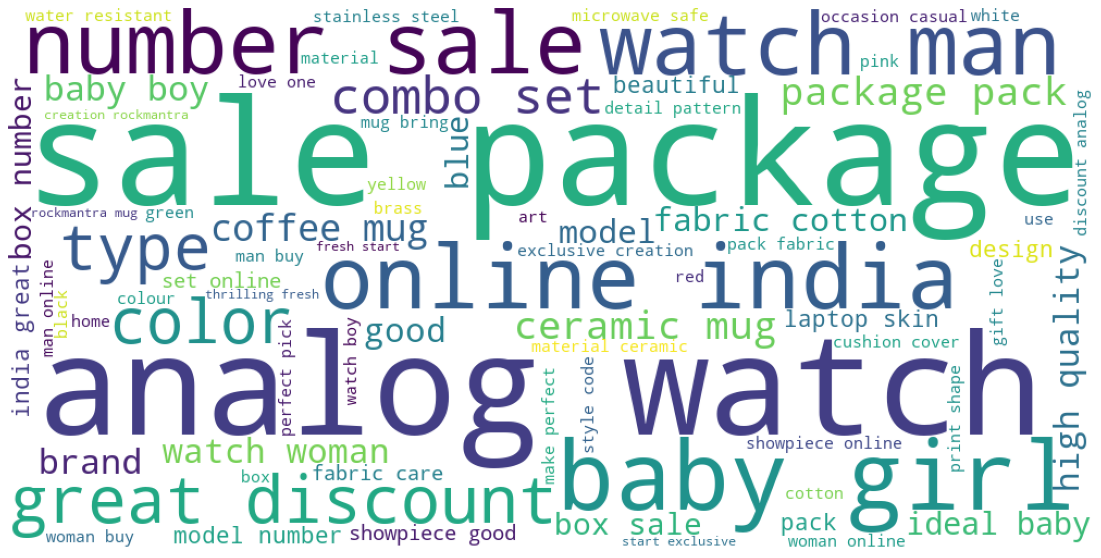

In [ ]:
plt.figure(figsize=(20,10))
wordcloud= WordCloud(background_color='white', 
                    max_words=75, width=1000, height=500).generate(" ".join(corpus))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
test = pd.DataFrame(text_data.cleaned_tree.value_counts())
test

,cleaned_tree
Home Furnishing,150
Baby Care,150
Watches,150
Home Decor & Festive Needs,150
Kitchen & Dining,150
Beauty and Personal Care,150
Computers,150


In [ ]:
list_cat = list(test.index)
print(len(list_cat))

7


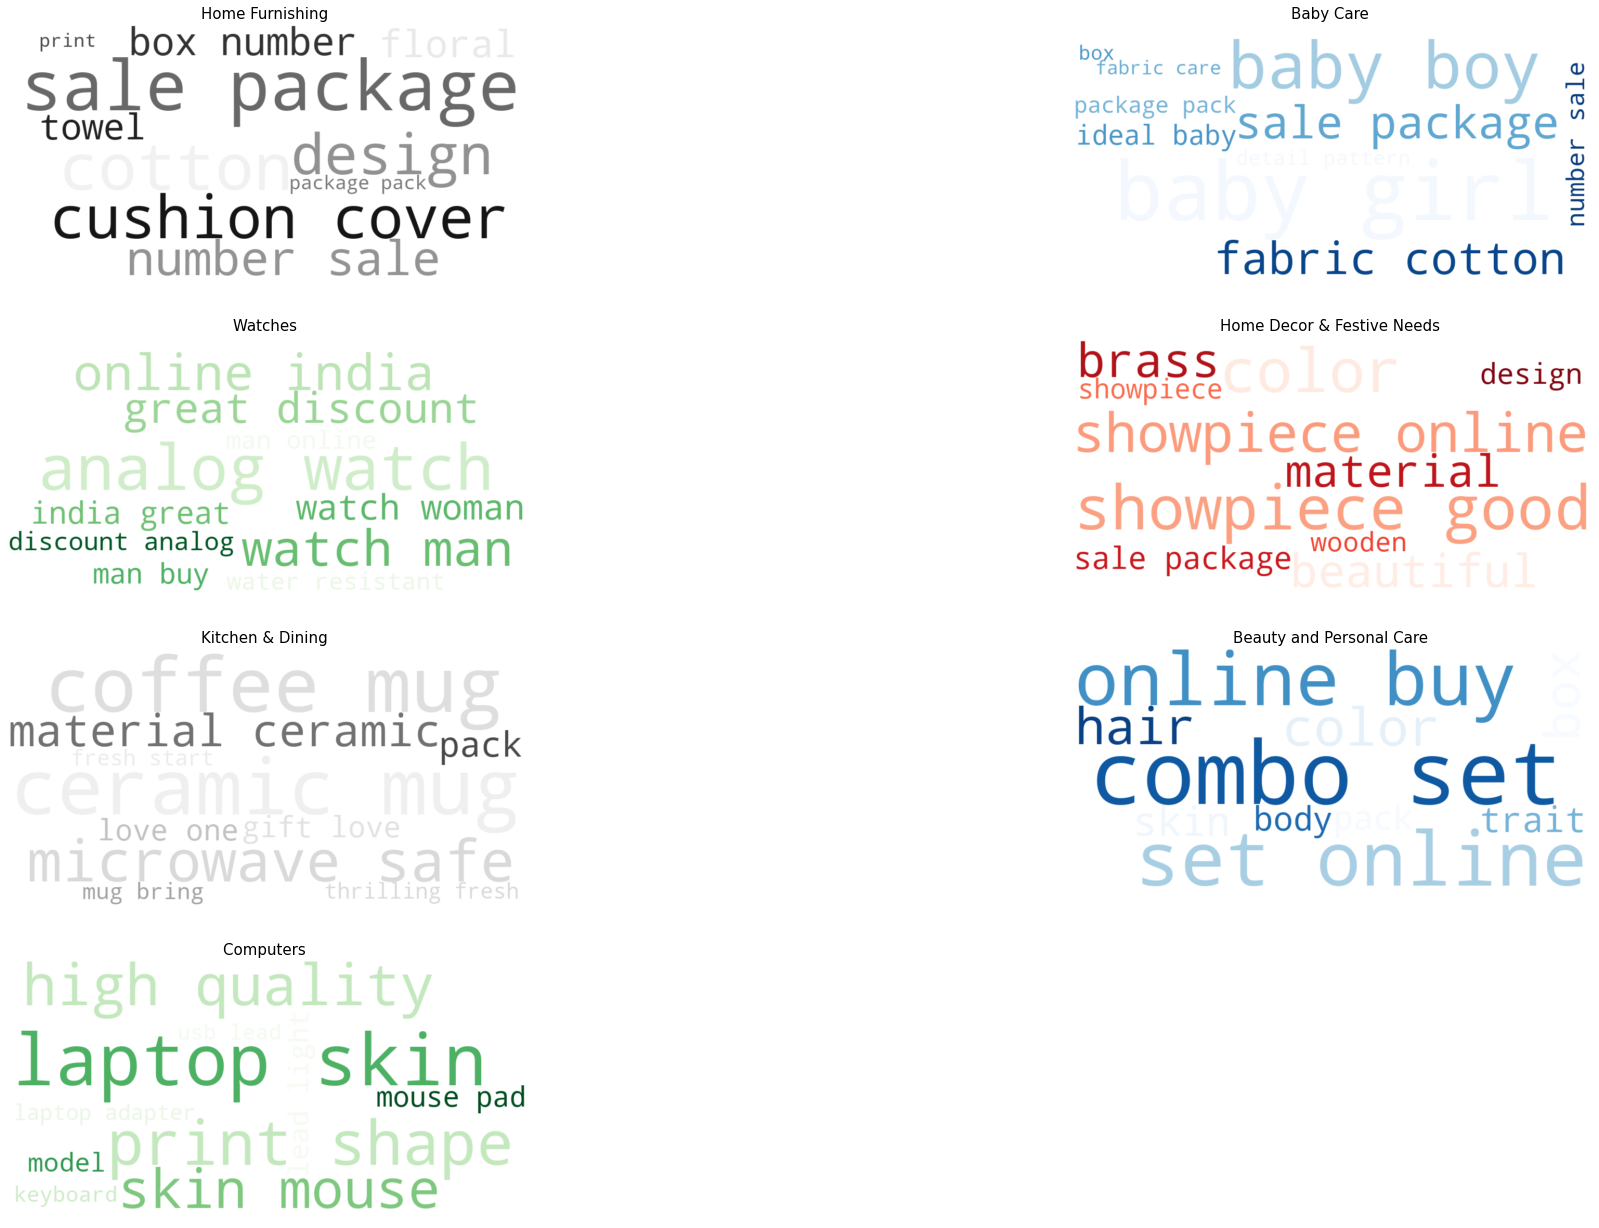

In [ ]:
fig = plt.figure(1, figsize=(35,22))
color = ["none","Greys", "Blues", "Greens", "Reds", "Greys", "Blues", "Greens", "Reds","Greys", "Blues", "Greens", "Reds", "Greys"]
all_c = []
increment = 1
for i in list_cat :
  df = text_data.loc[text_data['cleaned_tree'] == i]
  tmp = process_doc_v2("".join(df.description.values))
  c0 = list(pd.Series(tmp).value_counts().head(10).index)
  all_c.append(c0)
  ax1 = fig.add_subplot(4,2,increment)
  tmp_wc= WordCloud(background_color='white', 
                    max_words=10, width=1000, height=500, colormap = color[increment]).generate(" ".join(tmp))
  ax1.imshow(tmp_wc, interpolation="bilinear")
  ax1.axis('off')
  plt.title(i, fontsize = 15)
  increment = increment+ 1

In [ ]:
from collections import Counter

flat = []
for lists in all_c :
  for i in lists :
    flat.append(i)

double = Counter(flat)
double = pd.DataFrame.from_dict(double, orient = 'index')
double = double.loc[double[0] > 1]
double = list(double.index)
double

['design',
 'cotton',
 'pack',
 'color',
 'print',
 'package',
 'buy',
 'online',
 'gift',
 'box',
 'skin']

Now that we've a list of word in several cluster we can add a cleaning step for our tokenization.

In [ ]:
def cleaning_final(i):
    """ Processing the description in order to tokenize it"""
    doc = nlp(i)
    token = [i.lemma_ for i in doc if
         not i.is_punct
         and not i.is_currency
         and not i.is_stop
         and not i.is_space
         and i.is_alpha
         and not i.like_url]
    token_cleaned = [i for i in token if i not in to_remove]
    token_cleaned = [i for i in token_cleaned if i not in less_1]
    token_cleaned = [i for i in token_cleaned if len(i) > 2]
    token_cleaned = [i for i in token_cleaned if i not in double]
    token_cleaned = list(dict.fromkeys(token_cleaned))
    return " ".join(token_cleaned)

In [ ]:
text_data['tokens'] = text_data.description.apply(cleaning_final)
text_data['class_nb'] = LabelEncoder().fit_transform(text_data['cleaned_tree'])
text_data.sample(10)

,product_category_tree,description,cleaned_tree,tokens,class_nb
734,"[""Home Decor & Festive Needs >> Table Decor & Handicrafts >> Showpieces >> Religious Idols >> Radhika's World of Crafts Religious Idols""]","radhika's world of crafts ganesha with prabhavali showpiece - 19 cm (brass, yellow)\r\n price: rs. 3,780\r\n\t\t\t\t\r\n\t\t\ta very beautiful idol of lord ganesha with prabhavali. simple design n yet so elegant n magnificent with its balanced features like correct body ratio n intricate carving. an ideal objet d'art for your pooja room or just as a decorative for your work place or home. lord ganesha is a symbol of prosperity n remover of obstacles so wherever he is placed, he will take care of you.\r\n\r\nmade of best quality brass in antique finish by our master craftsmen.\r\n\r\nsize: length: 4.5"", width: 2.75"", height: 7.5""; \r\nweight: 1950 grams app.\r\n\r\nour artifacts are maintenance free.\r\na very beautiful idol of lord ganesha with prabhavali. sim...",Home Decor & Festive Needs,radhika world craft ganesha showpiece brass yellow beautiful idol lord simple elegant like correct body ratio carving ideal pooja room decorative work place home care good quality antique finish craftsman width gram app artifact maintenance,3
887,"[""Beauty and Personal Care >> Bath and Spa >> Body and Essential Oils >> SSCP Body and Essential Oils""]","sscp pine oil (30 ml)\r\n price: rs. 319\r\n\t\t\t\t\r\n\t\t\tpine oil is most useful to relieve mental, physical and sexual fatigue, while having a cleansing and invigorating effect on an area and is great for vapor therapy in a sick room as it promotes healing. it can be used for cuts and sores, scabies and lice and for excessive perspiration, while its warming properties help with rheumatism, arthritis, gout, muscular aches and pains and it can stimulate circulation. furthermore it can help in cases of bronchitis, asthma, catarrh, coughs, laryngitis, colds and flu. it eases breathlessness and sinusitis.\r\npine oil is most useful to relieve mental, physical and sexual fatigue, while having a cleansing and invigorating effect on an area and is great for vapor ...",Beauty and Personal Care,sscp pine oil useful mental physical have effect area great room healing cut warming property help case cold ease,1
385,"[""Beauty and Personal Care >> Fragrances >> Deodorants >> Combos >> Archies Combos""]",flipkart.com: buy archies vj-580 combo set online only for rs. 399 from flipkart.com. only genuine products. 30 day replacement guarantee. free shipping. cash on delivery!,Beauty and Personal Care,combo set,1
992,"[""Kitchen & Dining >> Bar & Glassware >> Bar Accessories >> Cork Screws >> Pedrini Cork Screws""]",pedrini steel waiters corkscrew\r\n price: rs. 300\r\n\t\t\t\t\r\n\t\t\tpedrini waiter corkscrew with knife\r\npedrini waiter corkscrew with knife,Kitchen & Dining,steel corkscrew,5
973,"[""Home Decor & Festive Needs >> Showpiece >> Gramophones >> ROYLE KATOCH Gramophones >> ROYLE KATOCH Showpiece - 24 cm (Crystal, Woode...""]","key features of royle katoch showpiece - 24 cm 2 integrated bird are seat at branch made of 300 beads at workstation, it leads to a successful professional life and financial wealth will eventually follow. this crystal tree made from wood and gems. it works wonders on amnesia patients by helping them sleep peacefully and shoo away bad dreams and nightmares. it can be placed in student's room or bedside in bedroom. product colour may slightly vary due to photographic lighting sources or your monitor settings.,royle katoch showpiece - 24 cm (crystal, wooden, multicolor) price: rs. 699 crystals are a tool and can be like a storage battery for thought energy. “clearing” has to do with the energy of the stone or crystal. chakra crystals can be “programmed” with our thought energy and th...",Home Decor & Festive Needs,key katoch showpiece bird seat lead professional life wealth follow crystal tree wood work help sleep away place room bedroom colour slightly vary p

In [ ]:
### nb of token per line 
import re

count_list = []

for index, row in text_data.iterrows() :
  line = row['tokens']
  count = len(re.findall(r'\w+', line))
  count_list.append(count)

print(max(count_list))

120


## <u>Functions

In [ ]:
### Calculation of ARI SCORE 
def ari_scoring(result) :
  perplex = (text_data.shape[0])**((1/2))
  true_lab = text_data['class_nb']
  tsne = TSNE(n_components=2, perplexity=perplex, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
  result_TSNE = tsne.fit_transform(result)
  pred = KMeans(n_clusters = stemmed_tree, random_state=42)
  pred.fit(result_TSNE)
  pred_lab = pred.labels_
  ARI_Score = np.round(adjusted_rand_score(true_lab, pred_lab), 3)
  print("ARI Score is : ", ARI_Score)

  return ARI_Score, result_TSNE, pred_lab

### Plotting
def plotting(result_TSNE, true_lab, labels, ARI_Score) :
  fig = plt.figure(figsize=(25,12))
  ax = fig.add_subplot(121)
  scatter = ax.scatter(result_TSNE[:,0],result_TSNE[:,1], c=true_lab, cmap='Set1')
  ax.legend(handles=scatter.legend_elements()[0], labels=list(set(text_data['cleaned_tree'])), loc="best", title="Categorie")
  plt.title('2D graph representing products in their real categories.')
  ax = fig.add_subplot(122)
  scatter = ax.scatter(result_TSNE[:,0],result_TSNE[:,1], c=labels, cmap='Set1')
  ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
  plt.title('2D graph representing products by clustering.')
    
  plt.show()


### Confusion matrix 

def conf_matrix(real, predicted, ARI_Score) :
  cm = confusion_matrix(real, predicted)
  plt.figure(figsize=(20,7))
  sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'rocket_r');
  plt.ylabel('Actual Class');
  plt.xlabel('Predicted Class');
  all_sample_title = "ARI_Score: %0.2f" % (ARI_Score)
  plt.title(all_sample_title, size = 15)

  plt.show()

In [ ]:
### Creation of a dataframe that will contain every ARI Score for each model tested
df_result = pd.DataFrame(columns=['Model', 'ARI_Score'])
df_result

,Model,ARI_Score


## <u>CountVectorizer / TF-IDF

### CountVectorizer

This method is a basic One Hot Encoder. It represent text in numerical arrays full of 0s and 1s. Dimension is equal to number of unique word in corpus.

ARI Score is :  0.384


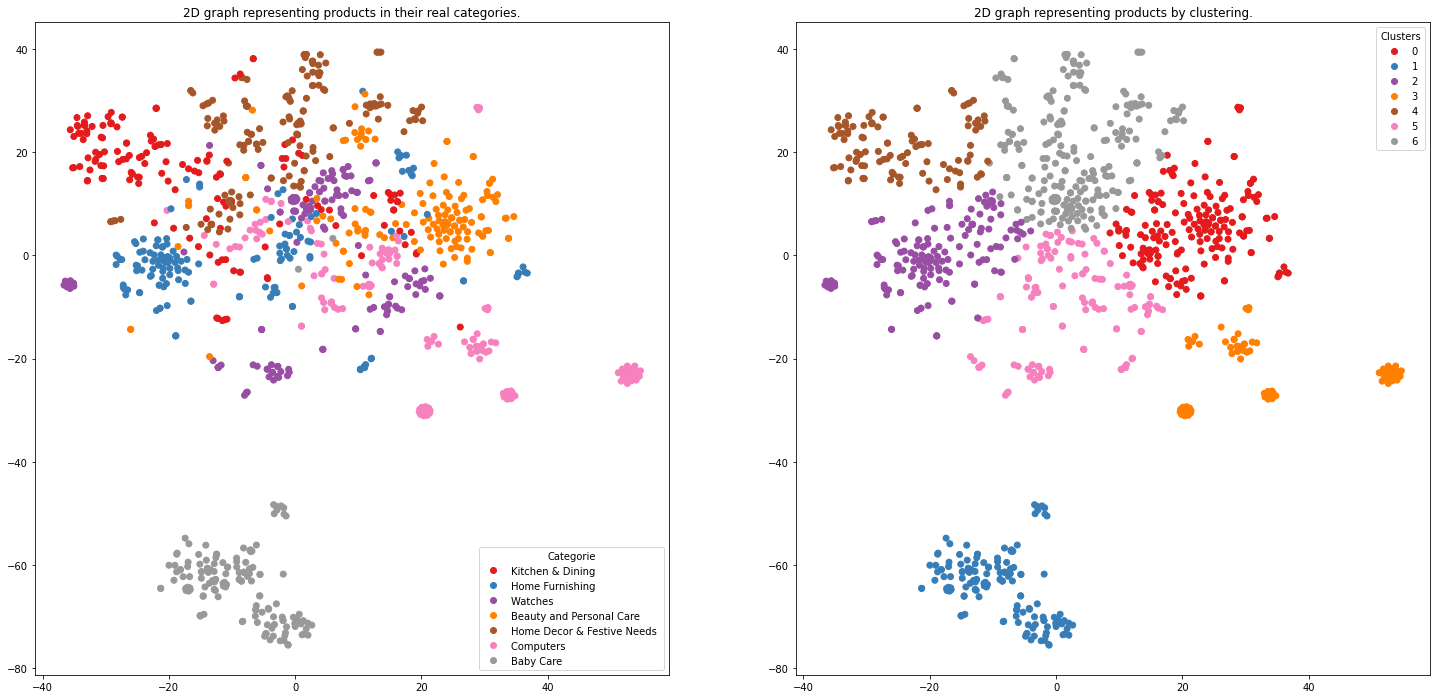

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
CV_result = CV.fit_transform(text_data['tokens'])

ARI_Score, result_TSNE, pred_lab = ari_scoring(CV_result)

plotting(result_TSNE, text_data['class_nb'], pred_lab, ARI_Score)

In [ ]:
new_row = {'Model' : 'CountVectorizer', 'ARI_Score': ARI_Score}
df_result = df_result.append(new_row, ignore_index=True)

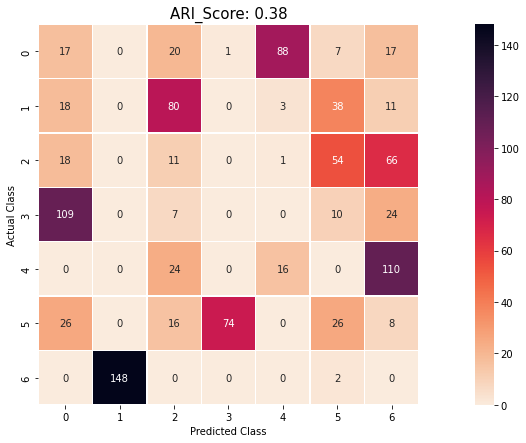

In [ ]:
conf_matrix(text_data['class_nb'], pred_lab, ARI_Score)

### TF-IDF

This method is related to CountVectorizer, instead of counting word, words are represented by their term frequency multiplied by their inverse document frequency.

If a word appears a lot everywhere, its weight will be low, it doesn't provide a decisional information. 

However, if a word appears very little or appears frequently, but only in one or two places, then these are probably more important words and should be weighted as such.

ARI Score is :  0.483


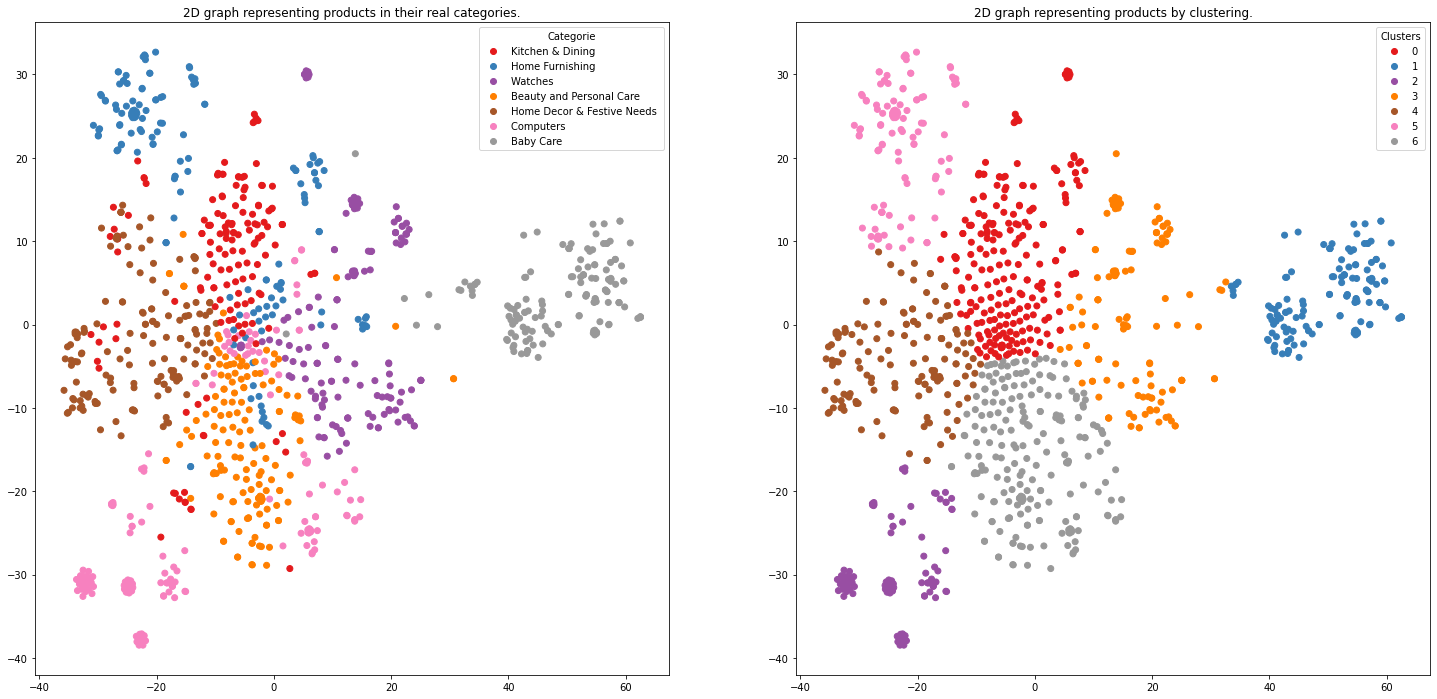

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

TF = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)
TF_result = TF.fit_transform(text_data['tokens'])

ARI_Score, result_TSNE, pred_lab = ari_scoring(TF_result)

plotting(result_TSNE, text_data['class_nb'], pred_lab, ARI_Score)

In [ ]:
new_row = {'Model' : 'TF-IDF', 'ARI_Score': ARI_Score}
df_result = df_result.append(new_row, ignore_index=True)

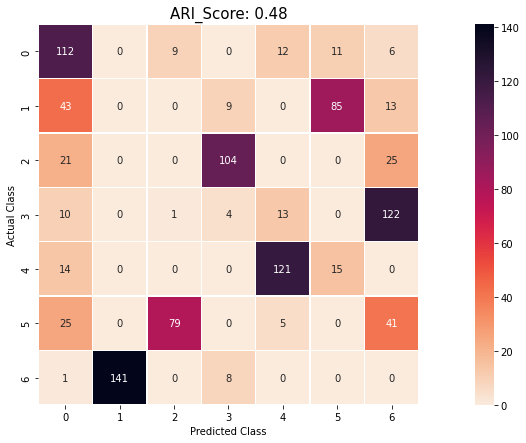

In [ ]:
conf_matrix(text_data['class_nb'], pred_lab, ARI_Score)

## <u>Word2Vec Embedding (Google)


Word2Vec is based on neural probabilistic models, which are models that learn an embedding by achieving some task, here classification.

Here Word2Vec creates analogies between words based on vector arithmetic.

Ex: King + Son - Daughter = Queen

### Librairies

In [ ]:
import gensim
import multiprocessing

from gensim.models import Word2Vec

import tensorflow as tf
import tensorflow.keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

### Settings

In [ ]:
# WORD2VEC 
W2V_SIZE = 100
W2V_WINDOW = 5
W2V_EPOCH = 30
W2V_MIN_COUNT = 10
W2V_NEG = 0

# KERAS
SEQUENCE_LENGTH = 100
EPOCHS = 8

### Initializing

In [ ]:
cores = multiprocessing.cpu_count()

w2v_model = Word2Vec(min_count=W2V_MIN_COUNT, ### Ignores all words with total absolute frequency lower than this
                     window=W2V_WINDOW,     ### The maximum distance between the current and predicted word within a sentence.
                     size=W2V_SIZE,     ### Dimensionality of the feature vectors
                     negative=W2V_NEG,  ### If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be drown. If set to 0, no negative sampling is used. 
                     workers=cores-1)  ### Use these many worker threads to train the model

### Building

In [ ]:
X = [row.split() for row in text_data['tokens']]
w2v_model.build_vocab(X)

In [ ]:
print("Vocab size :", len(w2v_model.wv.vocab.keys()))

Vocab size : 480


### Training

In [ ]:
w2v_model.train(X, total_examples=len(X), epochs=W2V_EPOCH)

(327584, 549450)

### Exploring

In [ ]:
w2v_model.wv.most_similar(positive=["mug"])

[('help', 0.27791494131088257),
 ('thread', 0.2758195400238037),
 ('elegant', 0.24765166640281677),
 ('broadcast', 0.24392500519752502),
 ('stone', 0.2272883653640747),
 ('battery', 0.21835055947303772),
 ('prithish', 0.2084703892469406),
 ('damage', 0.20178793370723724),
 ('fashion', 0.19945402443408966),
 ('smart', 0.19662612676620483)]

In [ ]:
w2v_model.wv.most_similar(positive=["watch"])

[('happy', 0.27915889024734497),
 ('pin', 0.2773273289203644),
 ('device', 0.27290216088294983),
 ('party', 0.2706505060195923),
 ('smile', 0.25222891569137573),
 ('tone', 0.23458464443683624),
 ('crafting', 0.21421292424201965),
 ('additional', 0.21318334341049194),
 ('quantity', 0.21311576664447784),
 ('enjoy', 0.20697838068008423)]

In [ ]:
w2v_model.wv.most_similar(positive=["baby"])

[('freezer', 0.31284666061401367),
 ('charge', 0.29742807149887085),
 ('party', 0.24025867879390717),
 ('cms', 0.23446369171142578),
 ('voltage', 0.22795361280441284),
 ('give', 0.22582557797431946),
 ('area', 0.2154480516910553),
 ('night', 0.2150166630744934),
 ('touch', 0.20536300539970398),
 ('strap', 0.20432870090007782)]

### Tokenization

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data.tokens)

vocab_size = len(tokenizer.word_index) + 1
print("Total words :", vocab_size)

Total words : 1597


In [ ]:
res_seq = pad_sequences(tokenizer.texts_to_sequences(text_data.tokens), maxlen=SEQUENCE_LENGTH)

### Embedding layer

In [ ]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(1597, 100)


In [ ]:
input=Input(shape=(len(res_seq),SEQUENCE_LENGTH),dtype='float64')
word_input=Input(shape=(SEQUENCE_LENGTH,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=W2V_SIZE,
                         weights = [embedding_matrix],
                         input_length=SEQUENCE_LENGTH)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 100)          159700    
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 159,700
Trainable params: 159,700
Non-trainable params: 0
_________________________________________________________________


### Scoring & Vizualisation

In [ ]:
embeddings = embed_model.predict(res_seq)
embeddings.shape

33/33 [==============================] - 0s 2ms/step


(1050, 100)

In [ ]:
ARI_Score, result_TSNE, pred_lab = ari_scoring(embeddings)

ARI Score is :  0.329


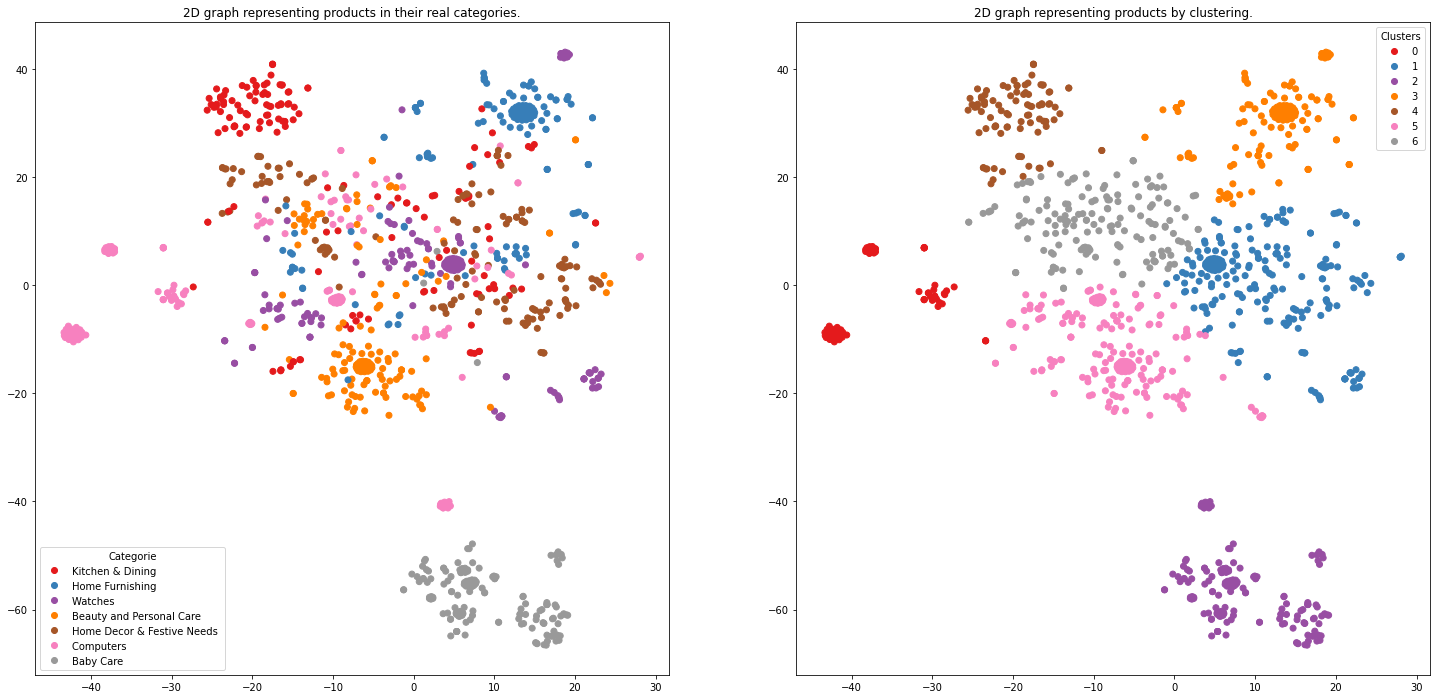

In [ ]:
plotting(result_TSNE, text_data['class_nb'], pred_lab, ARI_Score)

In [ ]:
new_row = {'Model' : 'Word2Vec', 'ARI_Score': ARI_Score}
df_result = df_result.append(new_row, ignore_index=True)

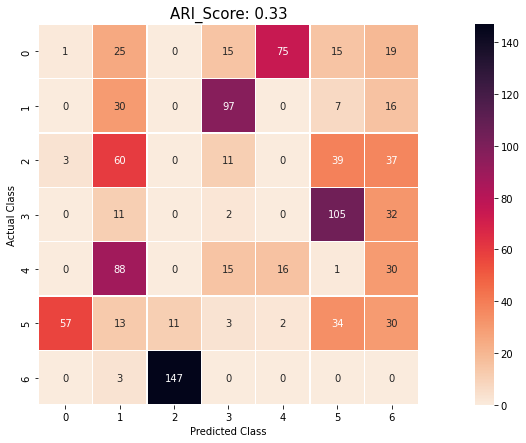

In [ ]:
conf_matrix(text_data['class_nb'], pred_lab, ARI_Score)

## <u>Glove Embedding (Stanford)

GloVe is an extension of word2vec, and a much better one at that. 
It is very good at global information, but it doesn’t capture meanings so well.

In [ ]:
emb_index = {}
f = open('/content/gdrive/MyDrive/Flipkart/glove.6B.100d.txt', encoding ="utf8")
for line in f :
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype = 'float32')
  emb_index[word] = coefs
f.close()
print(f'Glove Vector is composed with {len(emb_index)} words')

Glove Vector is composed with 400001 words


In [ ]:
dim = 100
emb_matrix = np.zeros((vocab_size,dim))
for word, i in tokenizer.word_index.items() : 
  emb_vec = emb_index.get(word)
  if i < vocab_size :
    if emb_vec is not None :
      emb_matrix[i] = emb_vec

In [ ]:
### Modeling 
input=Input(shape=(len(emb_matrix),dim),dtype='float64')
word_input=Input(shape=(dim,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=dim,
                         weights = [emb_matrix],
                         input_length=dim)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
model = Model([word_input],word_vec)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 100, 100)          159700    
                                                                 
 global_average_pooling1d_1   (None, 100)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 159,700
Trainable params: 159,700
Non-trainable params: 0
_________________________________________________________________


In [ ]:
glove_res = model.predict(res_seq)
glove_res.shape

33/33 [==============================] - 0s 2ms/step


(1050, 100)

In [ ]:
ARI_Score, result_TSNE, pred_lab = ari_scoring(glove_res)

ARI Score is :  0.148


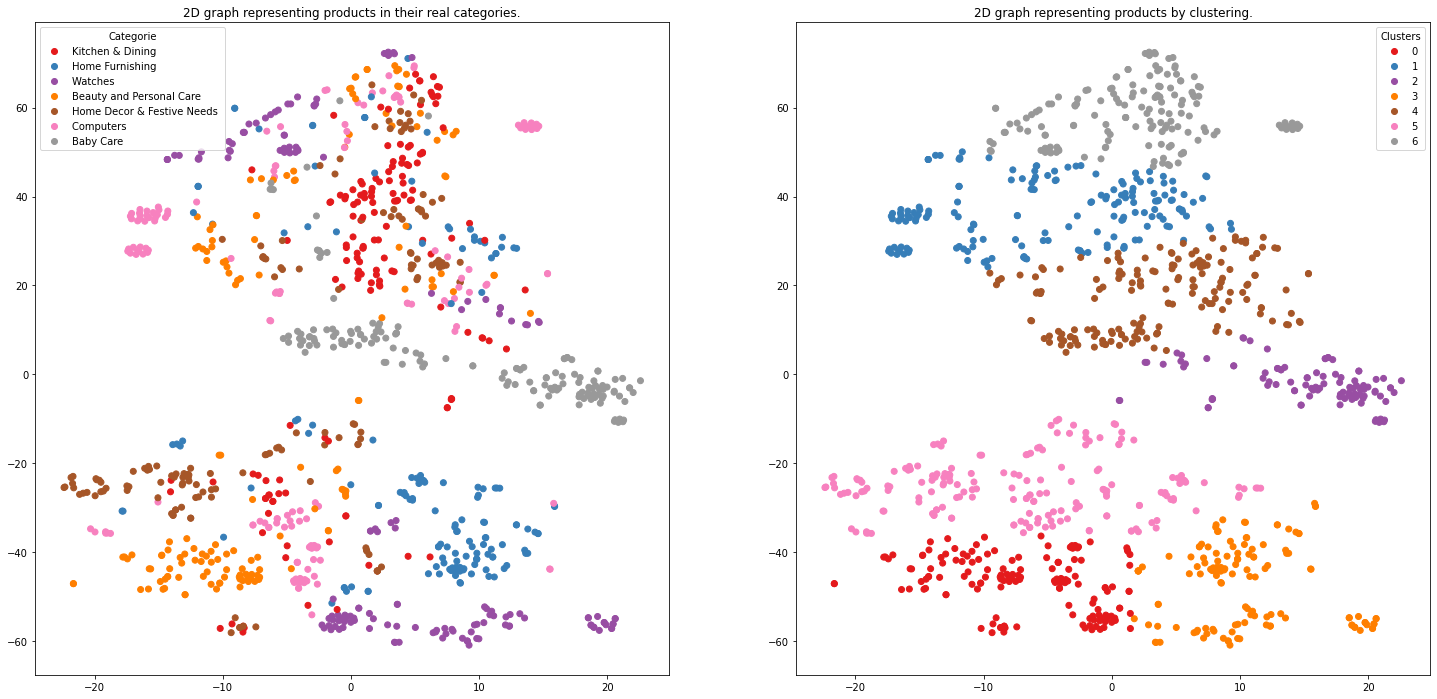

In [ ]:
plotting(result_TSNE, text_data['class_nb'], pred_lab, ARI_Score)

In [ ]:
new_row = {'Model' : 'GLoVe', 'ARI_Score': ARI_Score}
df_result = df_result.append(new_row, ignore_index=True)

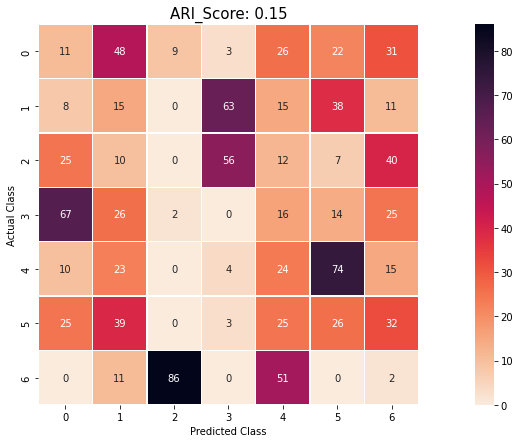

In [ ]:
conf_matrix(text_data['class_nb'], pred_lab, ARI_Score)

## <u>BERT (Bidirectional Encoder Representations from Transformers)</u>  [How to : Text classification](https://www.tensorflow.org/text/tutorials/classify_text_with_bert)

BERT is basically the transformer architecture, which aims to solve sequence-to-sequence tasks while handling long-range dependencies with ease, but trained to learn language representations, and conceived to be used as the main architecture to NLP tasks. It mainly differs from the precedent language models because its learned representations contain context from both sides of the sentences

### BERT related functions

In [ ]:
# Sentence Preparation
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot

This function is used in the next one.
It returns, for each sentence, inputs used in model prediction below.

<u>***input_ids***</u> :  indices of the input tokens from the vocab file

<u>***token_type_ids***</u> : 0s for the first sentence and 1 for the second sentence

<u>***attention_mask***</u> : padding value added to the right side of the tokens in shorter sentences and to ensure the model will not look into those padded values.

<u>***bert_inp_tot***</u> : both of the 3 above

In [ ]:
# Feature creation
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("Elapsed time : ", time2)
     
    return features_bert, last_hidden_states_tot

### Tensorflow Hub & BERT

In [ ]:
import tensorflow_hub as hub

model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [ ]:
### Raw description data needed, only tokenized, not cleaned

def simple_token(text):
    doc = nlp(text)
    token = [i for i in doc]
    res = [str(i) for i in token]
    return " ".join(res)
text_data['Bert_input'] = text_data.description.apply(simple_token)

In [ ]:
sentences = text_data['Bert_input'].to_list()

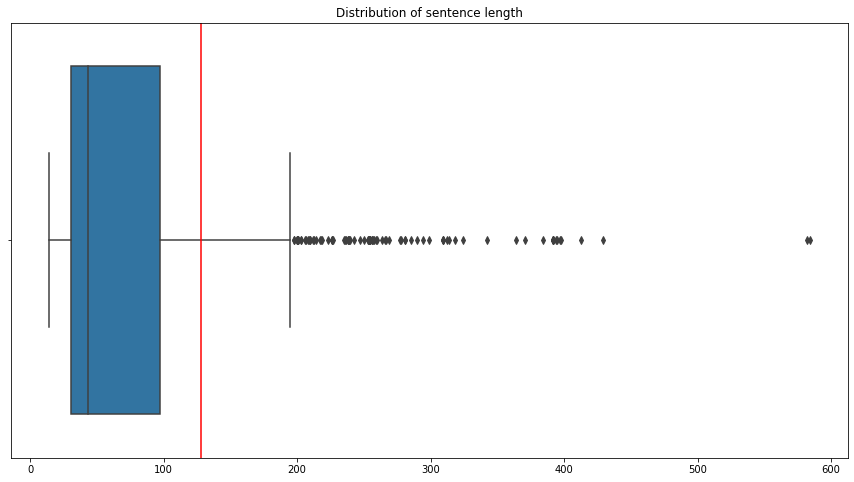

In [ ]:
count_token = []

for index, row in text_data.iterrows() :
  line = row['Bert_input']
  count = len(re.findall(r'\w+', line))
  count_token.append(count)

plt.figure(figsize=(15,8))
sns.boxplot(count_token)
plt.axvline(x=128, c='r')
plt.title("Distribution of sentence length")
plt.show()

In [ ]:
max_length = 128
batch_size = 50
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/vocab.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_ac

Elapsed time :  580.0


ARI Score is :  0.322


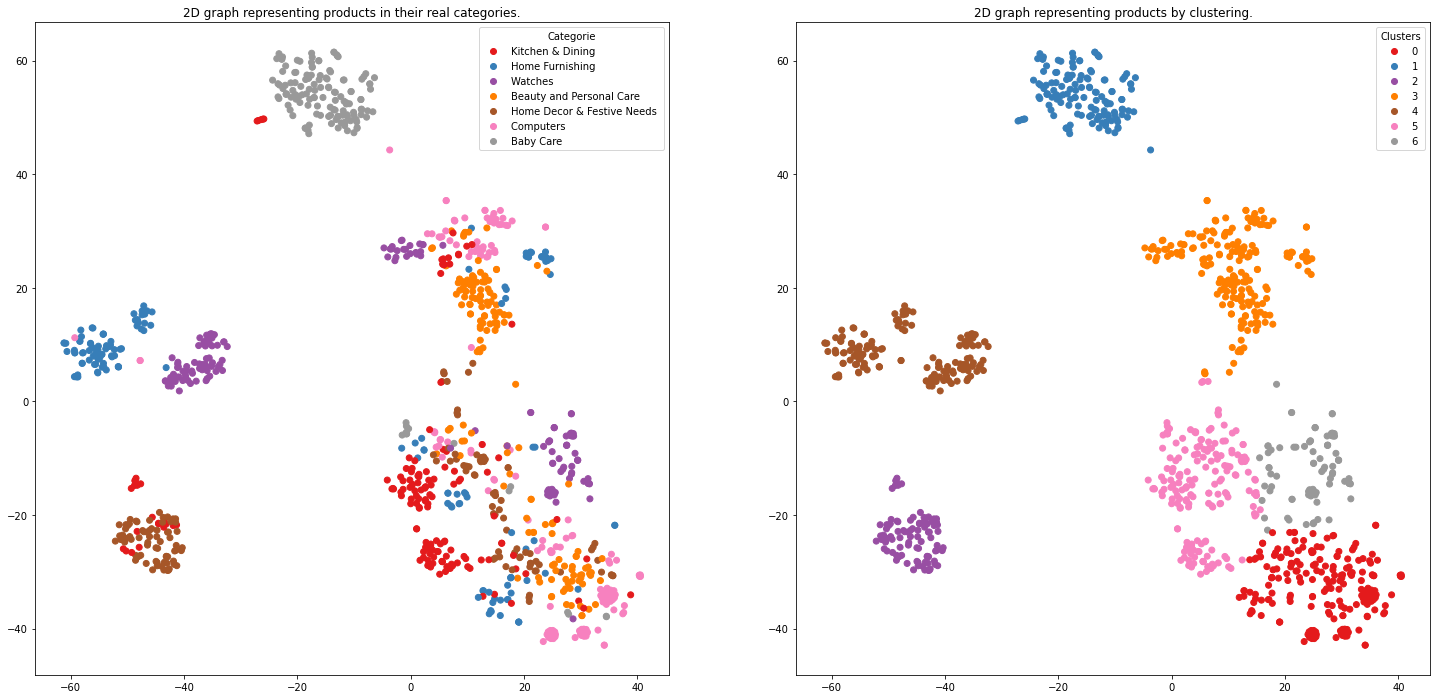

In [ ]:
ARI_Score, result_TSNE, pred_lab = ari_scoring(features_bert)

plotting(result_TSNE, text_data['class_nb'], pred_lab, ARI_Score)

In [ ]:
new_row = {'Model' : 'Hub_BERT_base', 'ARI_Score': ARI_Score}
df_result = df_result.append(new_row, ignore_index=True)

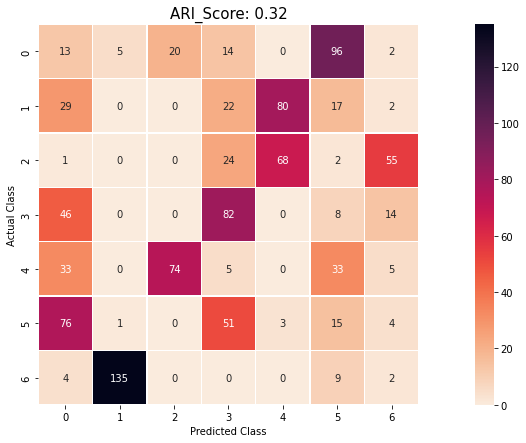

In [ ]:
conf_matrix(text_data['class_nb'], pred_lab, ARI_Score)

### BERT HuggingFace

In [ ]:
max_length = 128
batch_size = 50
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = text_data['Bert_input'].to_list()

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

loading weights file tf_model.h5 from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/tf_model.h5
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training

In [ ]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/vocab.txt
loading file to

1/1 [==============================] - 40s 40s/step
Elapsed time :  1585.0


ARI Score is :  0.287


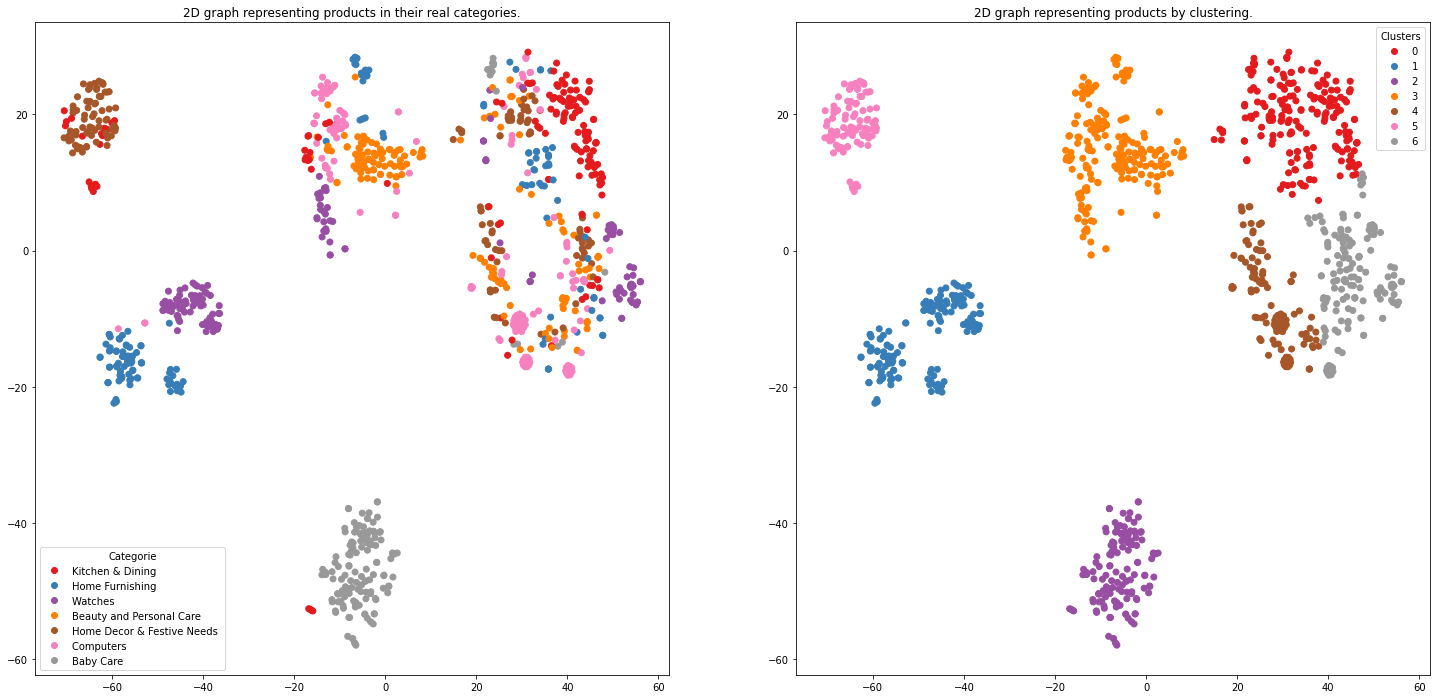

In [ ]:
ARI_Score, result_TSNE, pred_lab = ari_scoring(features_bert)

plotting(result_TSNE, text_data['class_nb'], pred_lab, ARI_Score)

In [ ]:
new_row = {'Model' : 'HuggingFace_BERT_base', 'ARI_Score': ARI_Score}
df_result = df_result.append(new_row, ignore_index=True)

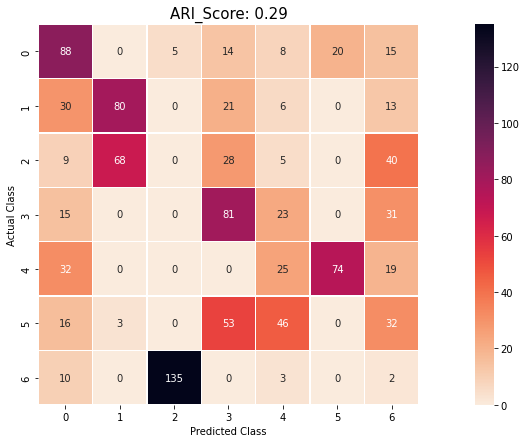

In [ ]:
conf_matrix(text_data['class_nb'], pred_lab, ARI_Score)

## <u>USE (Universal Sentence Encoder)

The Universal Sentence Encoder encodes text into high dimensional vectors.

The idea is to design an encoder that summarizes any given sentence to a 512-dimensional sentence embedding.

We use this same embedding to solve multiple tasks and based on the mistakes it makes on those, we update the sentence embedding. Since the same embedding has to work on multiple generic tasks, it will capture only the most informative features and discard noise.

In [ ]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [ ]:
batch_size = 50
sentences = text_data['Bert_input'].to_list()

In [ ]:
features_USE = feature_USE_fct(sentences, batch_size)

ARI Score is :  0.439


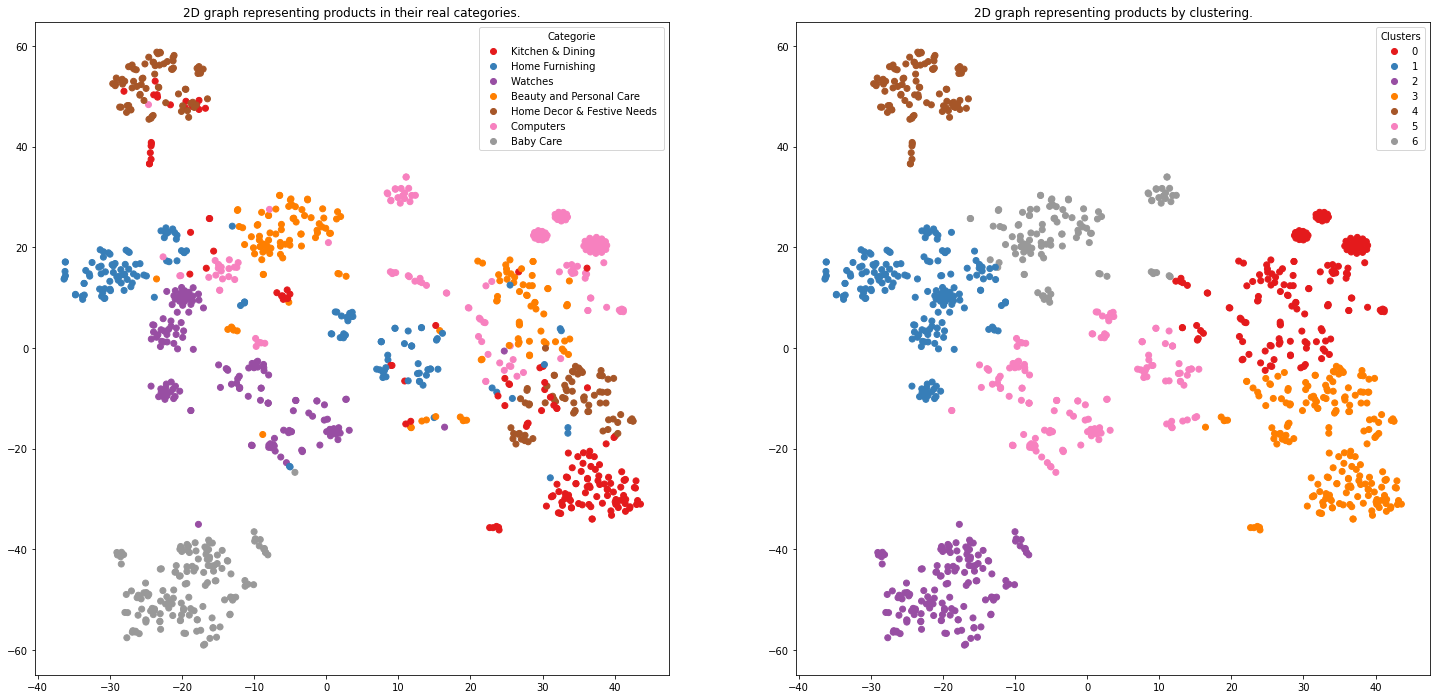

In [ ]:
ARI_Score, result_TSNE, pred_lab = ari_scoring(features_USE)

plotting(result_TSNE, text_data['class_nb'], pred_lab, ARI_Score)

In [ ]:
new_row = {'Model' : 'USE_hub', 'ARI_Score': ARI_Score}
df_result = df_result.append(new_row, ignore_index=True)

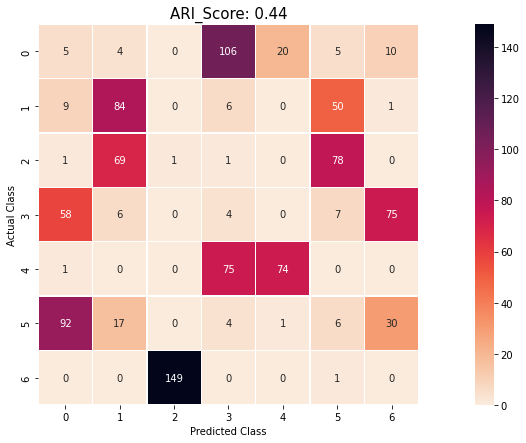

In [ ]:
conf_matrix(text_data['class_nb'], pred_lab, ARI_Score)

## <u>LDA (Latent Dirichlet Allocation) & LDAviz

This is a method that has been used for topic modeling let's try it in our case.

In [ ]:
proc_docs=[d.split() for d in text_data['tokens']]
dictionary=gensim.corpora.Dictionary(proc_docs)

In [ ]:
dictionary.filter_extremes(no_below=10,no_above=0.1,keep_n=512)

In [ ]:
bow_corpus=[dictionary.doc2bow(doc) for doc in proc_docs]

In [ ]:
LDA_tfidf=gensim.models.TfidfModel(bow_corpus)
corpus_LDA_tfidf=LDA_tfidf[bow_corpus]

In [ ]:
LDA_model_tfidf = gensim.models.ldamodel.LdaModel(corpus_LDA_tfidf, 
                                             num_topics=7, 
                                             id2word = dictionary, 
                                             passes = 20,
                                             alpha="auto", 
                                             random_state=42)

In [ ]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(LDA_model_tfidf, corpus_LDA_tfidf, dictionary, mds="mmds", R=7)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.002500  0.001585       1        1  20.440539
3     -0.060735 -0.263001       2        1  19.314877
4     -0.261319 -0.054366       3        1  15.000731
5     -0.189443  0.202847       4        1  14.193345
6      0.180940 -0.157915       5        1  11.654933
0      0.235426  0.043236       6        1  10.685107
2      0.092631  0.227615       7        1   8.710468, topic_info=           Term       Freq      Total Category  logprob  loglift
160       combo  45.000000  45.000000  Default   7.0000   7.0000
292   showpiece  41.000000  41.000000  Default   6.0000   6.0000
35          man  34.000000  34.000000  Default   5.0000   5.0000
41        woman  25.000000  25.000000  Default   4.0000   4.0000
38        towel  15.000000  15.000000  Default   3.0000   3.0000
400      kadhai  14.000000  14.000000  Default   2.0000   2.0000
285      single  15.000000  15.000000  Default   1.0000   1.0000
296      sleeve   8.942878   9.685244   Topic1  -4.1956   1.5079
201        neck   8.422684   9.160630   Topic1  -4.2555   1.5037
307       offer   6.504553   7.248720   Topic1  -4.5139   1.4793
294       dress   6.261310   7.006644   Topic1  -4.5520   1.4752
94      regular   4.458397   5.192657   Topic1  -4.8916   1.4352
154      stripe   4.736757   5.520429   Topic1  -4.8311   1.4345
403       shirt   4.282245   5.012855   Topic1  -4.9319   1.4301
198        baby  13.975072  18.622609   Topic1  -3.7491   1.3005
32         girl  15.112439  21.305653   Topic1  -3.6709   1.2442
277    occasion   8.967263  12.440685   Topic1  -4.1928   1.2603
143      casual   8.529679  12.713187   Topic1  -4.2429   1.1886
61         wash   7.644363  12.681130   Topic1  -4.3524   1.0815
106        dial  16.437003  17.179114   Topic2  -3.5302   1.6001
139       strap  16.153084  16.895001   Topic2  -3.5477   1.5994
102   resistant  14.774119  15.579883   Topic2  -3.6369   1.5912
447      sonata  12.300251  13.032665   Topic2  -3.8202   1.5865
141       clasp   9.549762  10.282016   Topic2  -4.0733   1.5704
140      buckle   8.172684   8.904253   Topic2  -4.2290   1.5586
448      maxima   7.790385   8.522473   Topic2  -4.2769   1.5545
100     digital  10.084034  11.118413   Topic2  -4.0188   1.5466
35          man  30.197928  34.667255   Topic2  -2.9220   1.5063
31          boy  13.096123  23.360819   Topic2  -3.7575   1.0656
62        water  11.724639  18.187894   Topic2  -3.8681   1.2052
364    prithish   9.069119   9.810801   Topic3  -3.8721   1.8185
258       start   5.144639   5.878820   Topic3  -4.4390   1.7637
378  rockmantra   5.033915   5.768023   Topic3  -4.4608   1.7609
385       stone   6.235926   7.175305   Topic3  -4.2467   1.7568
452        rice   4.672894   5.416121   Topic3  -4.5352   1.7495
377   porcelain   4.459785   5.193602   Topic3  -4.5819   1.7447
372    crafting   4.459785   5.193602   Topic3  -4.5819   1.7447
223         usb  14.368887  17.152400   Topic3  -3.4119   1.7200
229    flexible   4.699559   5.484111   Topic3  -4.5295   1.7427
212         mug  12.032732  15.322544   Topic3  -3.5894   1.6554
159     ceramic  12.240118  15.873868   Topic3  -3.5723   1.6371
16        light   9.200963  13.590146   Topic3  -3.8577   1.5070
109        lead   7.746798  12.252617   Topic3  -4.0297   1.4386
292   showpiece  39.072502  41.302695   Topic4  -2.3563   1.8969
6       curtain   6.503595   7.237183   Topic4  -4.1493   1.8455
11       eyelet   5.977912   6.711160   Topic4  -4.2336   1.8367
450         spf   5.951479   6.684526   Topic4  -4.2380   1.8362
8          door   5.029677   5.763301   Topic4  -4.4063   1.8162
315      statue   4.564742   5.300295   Topic4  -4.5033   1.8030
316     ganesha   4.107428   4.845204   Topic4  -4.6089   1.7872
22    polyester   6.571959   8.013593   Topic4  -4.1389   1.7541
444        cell   7.694996   9.569050   Topic4  -3.9811   1.7344
446    pavilion   5.445321

That was done with unique words let's try to go with bi or tri-grams

In [ ]:
bigrams_phrases = gensim.models.Phrases(proc_docs, min_count = 3, threshold = 10)
trigram_phrases = gensim.models.Phrases(bigrams_phrases[proc_docs], threshold = 10)

bigram = gensim.models.phrases.Phraser(bigrams_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

In [ ]:
def make_bigrams(texts):
  return list(bigram[doc] for doc in texts)

def make_trigrams(texts):
  return list(trigram[bigram[doc]] for doc in texts)

In [ ]:
data_bigrams = make_bigrams(proc_docs)
data_trigrams_bigrams = make_trigrams(data_bigrams)

Little cleaning with TF_IDF

In [ ]:
id2word_tf = gensim.corpora.Dictionary(data_trigrams_bigrams)

corpus_tf = [id2word_tf.doc2bow(text) for text in data_trigrams_bigrams]

tfidf_model = gensim.models.TfidfModel(corpus_tf, id2word = id2word_tf)

In [ ]:
low_value = 0.05
words = []
words_missing = []

for i in range(0, len(corpus_tf)):
  bow = corpus_tf[i]
  low_values_words = []
  tfidf_ids = [id for id, value in tfidf_model[bow]]
  bow_ids = [id for id, value in bow]
  low_values_words = [id for id, value in tfidf_model[bow] if value < low_value]
  drops = low_values_words + words_missing
  for item in drops :
    words.append(id2word_tf[item])
  words_missing = [id for id in bow_ids if id not in tfidf_ids]
  new_bow = [b for b in bow if b[0] not in low_values_words and b[0] not in words_missing]
  corpus_tf[i] = new_bow

In [ ]:
LDA_cleaned = gensim.models.ldamodel.LdaModel(corpus_tf, 
                                             num_topics=7, 
                                             id2word = id2word_tf, 
                                             passes = 20,
                                             alpha="auto", 
                                             random_state=42)

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(LDA_cleaned, corpus_tf, id2word_tf, mds="mmds", R=7)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.022767  0.008073       1        1  17.881816
1     -0.034347 -0.186497       2        1  17.755878
2     -0.215187 -0.075760       3        1  16.262231
0     -0.168317  0.190345       4        1  13.694907
6      0.161033 -0.163055       5        1  13.615603
3      0.199192  0.026493       6        1  11.130492
4      0.080394  0.200400       7        1   9.659073, topic_info=                                       Term       Freq       Total Category  \
154                          great_discount  52.000000   52.000000  Default   
23                                     good  97.000000   97.000000  Default   
502                               combo_set  46.000000   46.000000  Default   
380                               baby_girl  40.000000   40.000000  Default   
186                                discount  26.000000   26.000000  Default   
726                          showpiece_good  47.000000   47.000000  Default   
884                                prithish  21.000000   21.000000  Default   
105                            pillow_cover   8.178101    8.917479   Topic1   
109                               type_flat   7.284140    8.022391   Topic1   
730                                   relax   6.367097    7.126037   Topic1   
1395                                 shower   5.423150    6.229186   Topic1   
462                                keyboard   6.141766    7.109892   Topic1   
1451                          kitchen_linen   4.603090    5.337222   Topic1   
1595                                  nylon   4.602632    5.337211   Topic1   
108                                   sheet   9.955651   11.618369   Topic1   
867                                  device   8.940184   10.603428   Topic1   
951                                portable  11.373356   14.091503   Topic1   
458                                flexible  12.346217   16.806266   Topic1   
67                                     bath   9.768379   13.244219   Topic1   
101                                     fit  14.680332   24.764513   Topic1   
60                                 material  31.753262  109.728947   Topic1   
7                                     brand  31.350914  110.971259   Topic1   
61                                    model  16.983866   36.314075   Topic1   
92                                      use  20.370238   52.722802   Topic1   
35                              number_sale  18.807003   81.703250   Topic1   
27                                      key  21.525735  142.775712   Topic1   
23                                     good  18.703079   97.456882   Topic1   
1060                            kadhai_good  15.607739   16.346154   Topic2   
11                                   create   9.215627    9.968011   Topic2   
1230                                  tenda   6.504384    7.237607   Topic2   
1640                                   keep   5.591816    6.326654   Topic2   
333                                diameter   7.107630    8.113763   Topic2   
487                               non_stick   5.528176    6.323453   Topic2   
1679                        canvas_painting   4.681357    5.415819   Topic2   
57                                      gsm   8.273680    9.953531   Topic2   
25                             high_quality  18.572270   30.415190   Topic2   
213                                   cover  19.923560   35.715095   Topic2   
60                                 material  40.071319  109.728947   Topic2   
366                      brand_model_number  17.646825   34.224057   Topic2   
330                                  damage  12.392667   19.695522   Topic2   
64                                     type  35.411858  131.336614   Topic2   
95                                    width  20.544392   49.819647   Topic2   
27                                      key  31.717881  142.775712   Topic

Looks like we can identify some topics more accurately thanks to bigrams/trigrams and tf_idf.

## <u>Conclusion

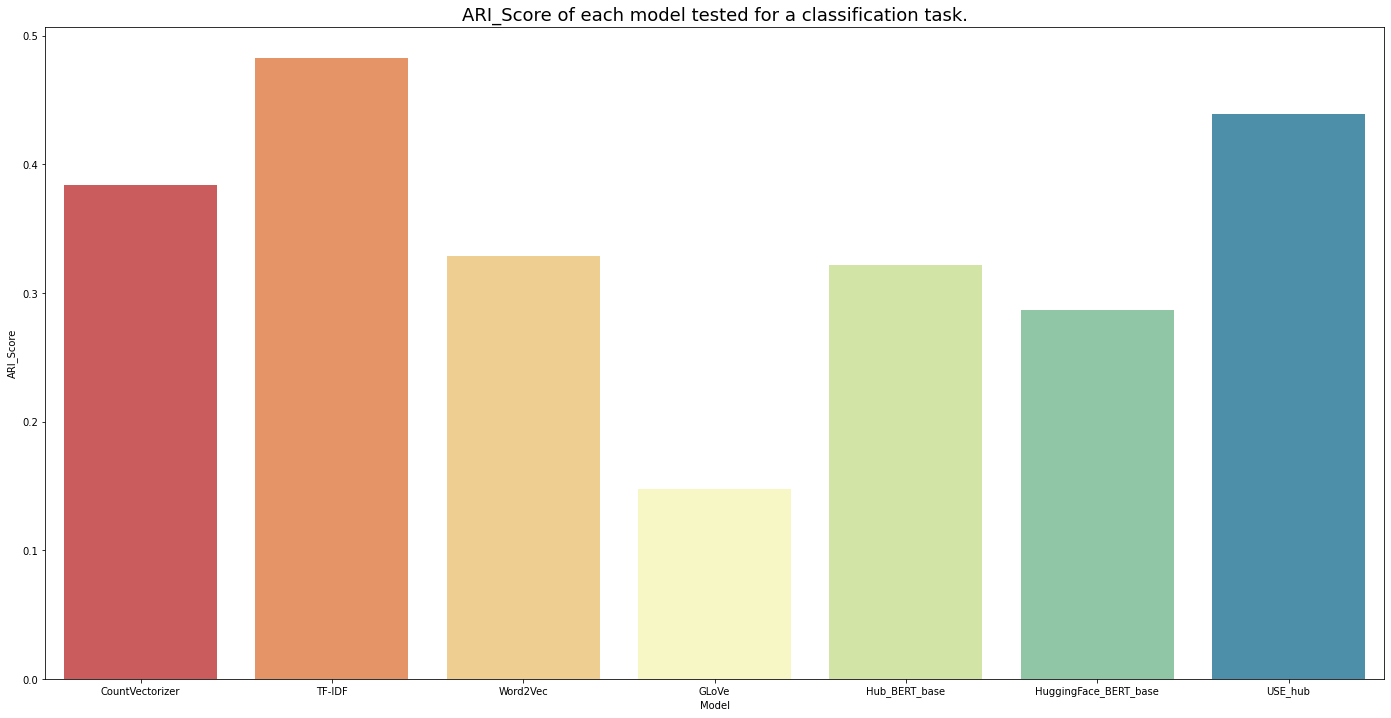

In [ ]:
plt.figure(figsize=(24,12))
sns.barplot(x=df_result["Model"], y=df_result["ARI_Score"], palette = 'Spectral')
plt.title("ARI_Score of each model tested for a classification task.", fontsize = 18)
plt.show()

As we can see, TF-IDF gives us the best out of the box performance with almost 50 % of good classification. GloVe model is performing the worst on this dataset.

Maybe if we fine tune hyperparameters of USE_hub we could achieve the best performance.